# Data generator for a mixture of Gaussian peaks + linear baseline

\begin{equation}
\Large y_n = f(x_n) = \sum\limits_{m=1}^M [A_m \cdot e^{-\frac{(x_n-\mu_m)^2}{2\cdot\sigma_m^2}}] + \alpha\cdot{x} + \beta + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8



# Data generation

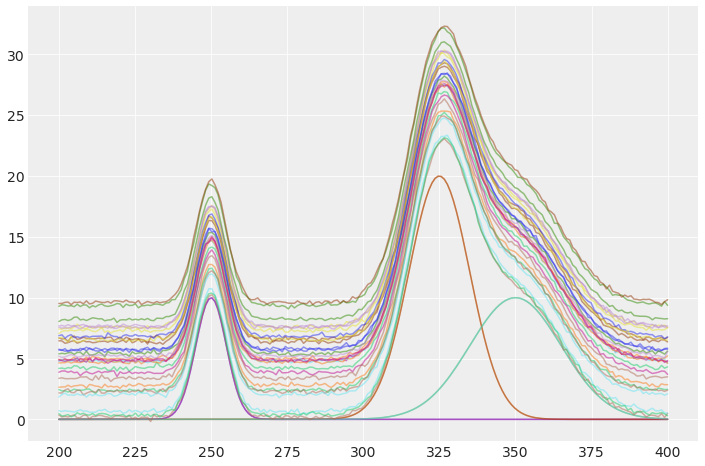

In [2]:
# number of wavelengths (x-values)
size = 200

# number of observations
obs = 30

# noise value
_epsilon = .1

# number of basis peaks (components)
npeaks = 3

# parameter values (class A)
_mu_a = [250, 325, 350]
_sigma_a = [5, 10, 15]
_amp_a = [10, 20, 10]

# parameter values (class B)
_mu_b = [250, 325, 350]
_sigma_b = [5, 10, 15]
_amp_b = [10, 20, 10]

# labels
Yl = []

# Predictor variable
X = np.linspace(200, 400, size)

# individual peaks (class A)
Za = np.zeros((npeaks, size))
for i in range(len(Za)):
    Za[i,:] = np.array(_amp_a[i] * np.exp(-(X-_mu_a[i])**2/(2*_sigma_a[i]**2)))  

# individual peaks (class B)
Zb = np.zeros((npeaks, size))
for i in range(len(Zb)):
    Zb[i,:] = np.array(_amp_b[i] * np.exp(-(X-_mu_b[i])**2/(2*_sigma_b[i]**2)))  
    
# total curve is the sum of the components
Yt = np.zeros((obs, size))
for idx in range(obs):
    # random values for alpha and beta
    #alpha = np.random.uniform(0,0.05)
    alpha = 0.0
    beta = np.random.uniform(0,5)
    gamma = np.random.uniform(5,10)
    if idx % 2 == 0:
        Yt[idx,:] = Za.sum(axis=0) + np.random.randn(size)*_epsilon + alpha * X + gamma
        Yl.append('A')
    else:
        Yt[idx,:] = Zb.sum(axis=0) + np.random.randn(size)*_epsilon + alpha * X + beta
        Yl.append('B')

Y = np.vstack([Za, Zb, Yt])

plt.figure(figsize=(12, 8))
for idx in range(len(Y)):
    plt.plot(X, Y[idx,:], "-", alpha=0.5);

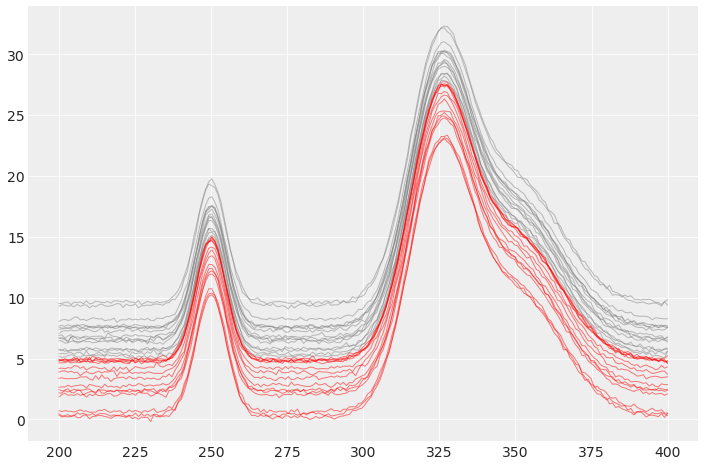

In [3]:
plt.figure(figsize=(12, 8))
for idx in range(len(Yt)):
    if Yl[idx] == "A":
        plt.plot(X, Yt[idx,:], "-", alpha=.5, color='gray', linewidth=1);
    else:    
        plt.plot(X, Yt[idx,:], "-", alpha=.5, color='red', linewidth=1);

# Convert to dataframe and save

In [4]:
# create dataframe
X = np.around(X, 1)
data = pd.DataFrame(data=Yt,columns=X)

# add label column
ll = pd.Series(Yl)
data = data.assign(label=pd.Series(ll))

# shuffle data
data = data.sample(frac=1, random_state=42)

data.head()

,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,...,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,label
27,4.909689,4.813463,4.763163,4.872797,4.901325,4.918430,5.044448,4.746996,4.820511,4.705613,...,4.989448,4.875325,5.023289,5.099468,4.885076,4.840565,4.885366,4.756874,4.748751,B
15,4.935598,4.869788,4.945916,4.871851,4.917096,5.119398,4.783591,4.977269,4.916699,5.111397,...,5.118988,5.177250,4.998797,4.905883,4.934472,5.031961,4.994829,5.031911,5.220482,B
23,2.171623,2.168272,2.411207,2.513147,2.210968,2.187691,2.407058,2.378667,2.010224,2.153205,...,2.412943,2.406773,2.436151,2.411553,2.497571,2.355391,2.399886,2.301765,2.395722,B
17,4.816587,4.877673,4.971210,4.851413,4.861246,4.818237,4.782789,4.986208,4.930459,4.940887,...,5.094585,5.009672,5.093557,4.841195,5.004400,4.759822,4.951603,4.684808,4.833333,B
8,6.686847,6.604365,6.629657,6.410791,6.750374,6.850262,6.572735,6.628017,6.742708,6.666920,...,6.544398,6.763383,6.754735,6.620374,6.601204,6.645302,6.742697,6.597297,6.730781,A


In [5]:
data.to_csv('./dummy_data_e.csv', index=False)